In [12]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
file = Path('./Resources/crypto_data.csv')


In [14]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [15]:
algos = set(df.Algorithm.values)
print(algos)

{'Cloverhash', 'CryptoNight-lite', 'Equihash', 'Lyra2Z', 'Quark', 'C11', 'Zhash', 'vDPOS', 'X13', 'CryptoNight-Lite', 'SHA-256D', 'Ouroboros', 'TRC10', 'Curve25519', 'X16R', 'QUAIT', 'Rainforest', 'SHA3', 'Argon2', 'Lyra2REv2', 'QuarkTX', 'Scrypt-n', 'Semux BFT consensus', 'Skein', 'Leased POS', 'SHA-512', 'HMQ1725', 'Slatechain', 'HybridScryptHash256', 'X11GOST', 'Wild Keccak', 'YescryptR16', 'X14', 'Scrypt', 'ScryptOG', 'Avesta hash', 'Exosis', 'X16S', 'SkunkHash v2 Raptor', 'NIST5', 'PHI2', 'DPoS', 'XG Hash', 'Equihash1927', 'M00N', 'Dagger-Hashimoto', 'Dagger', 'T-Inside', 'Shabal256', 'Time Travel', 'VeChainThor Authority', 'CryptoNight', 'Counterparty', 'SkunkHash', 'Cryptonight-GPU', 'Blake2S', 'Proof-of-BibleHash', 'Tribus', 'Momentum', 'QuBit', 'PoS', 'CryptoNight Heavy X', 'CryptoNight Heavy', 'Green Protocol', 'POS 3.0', 'PHI1612', '536', 'Multiple', 'Lyra2RE', 'CryptoNight-V7', 'SHA3-256', 'M7 POW', 'Proof-of-Authority', 'Ethash', 'ECC 256K1', 'POS 2.0', 'Blake', 'Blake2b',

In [16]:
df['IsTrading'].value_counts()


True     1144
False     108
Name: IsTrading, dtype: int64

In [18]:
df = df.loc[df['IsTrading'] == True]
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [19]:
df = df.dropna(axis=0, how='any')
df.shape

(685, 6)

In [20]:
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [21]:
df = df[df['TotalCoinsMined'] > 0]
len(df)


532

In [22]:
df = df.drop('CoinName', axis=1)
df.head()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethash,True,PoW,1.076842e+08,0


In [24]:
dummy = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
print(dummy.shape)
dummy.head()

(532, 99)


,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled[0]

array([ 0.        , -0.11710817, -0.1528703 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.06142951, -0.07530656, -0.0433963 , -0.06142951,
       -0.06142951, -0.0433963 , -0.0433963 , -0.19245009, -0.06142951,
       -0.09740465, -0.0433963 , -0.11547005, -0.07530656, -0.0433963 ,
       -0.0433963 , -0.15191091, -0.0433963 , -0.13118084, -0.0433963 ,
       -0.0433963 , -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.06142951, -0.0433963 , -0.08703883, -0.08703883,
       -0.08703883, -0.0433963 , -0.13118084, -0.13840913, -0.13840913,
       -0.0433963 , -0.06142951, -0.0433963 , -0.07530656, -0.18168574,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.07530656, -0.15826614,
       -0.31491833, -0.0433963 , -0.08703883, -0.07530656, -0.06142951,
        1.38675049, -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.39879994, -0.0433963 , -0.18

In [27]:
X_scaled.shape

(532, 99)

In [29]:
pca = PCA(n_components=.90)
principal_comp = pca.fit_transform(X_scaled)
principal_comp.shape

(532, 74)

In [30]:
pca.explained_variance_.sum()

88.47283457566155

In [32]:
tsne = TSNE(perplexity=50)
tsne_feat = tsne.fit_transform(principal_comp)
tsne_feat.shape

(532, 2)

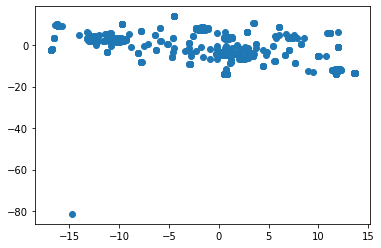

In [34]:
X = tsne_feat[:,0]
y = tsne_feat[:,1]
plt.scatter(X, y)
plt.show()

In [36]:
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

c:\Users\baske\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


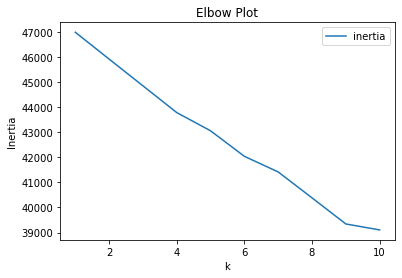

In [37]:
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

Summary


Cryptocurrencies are not meaningful enough for the clusters to be found in the dataset. Therfore can't be clusted togehter with this dataset provided.